## Data_analytics 3: Yoon Tae Park(yp2201@nyu.edu)

## What we would like you to do: (each question is worth 20% of the grade score):
### 1) Apply dimension reduction methods – specifically a PCA – to the data in columns 421-474. 

As laid out above, these columns contain self-report answers to personality and how these individuals experience movies, respectively. It is us to you whether you do one PCA each for personality and movie experience, or one overall, but regardless of that, we would like you to:  

#### a) Determine the number of factors (principal components) that you will interpret meaningfully (by a criterion of your choice – but make sure to name that criterion). Include a Scree plot in your answer.

- Meaningful number of factors: 8
- The elbow criterion: Pick only factors left of the biggest/sharpest drop(Scree plot included below)
- From the second biggest drop point, I plcked left of the factors, which were 8 in total

#### b) Semantically interpret what those factors represent (hint: Inspect the loadings matrix). Explicitly name the factors you found and decided to interpret meaningfully in 1a). Be creative.

- By inspecting the loadings matrix, I found a relationship among questions and names the factors as below


- Feature 0: Energetic
- Feature 1: Emotional
- Feature 2: Quiet
- Feature 3: Persevere
- Feature 4: Uninventive
- Feature 5: Unartistic
- Feature 6: Forgets easily
- Feature 7: Empathy

In [1]:
# Before answering questions, I will import some basic libraries and create dataset from given csv file
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('./movieReplicationSet.csv')

In [2]:
# 1097 * 54 columns
dataset_pca = dataset.iloc[:, 420:474]
dataset_pca.head(3)

,Is talkative,Tends to find fault with others,Does a thorough job,Is depressed/Blue,Is original/comes up with new ideas,Is reserved,Is helpful and unselfish with others,Can be somewhat careless,Is relaxed/handles stress well,Is curious about many different things,...,I have cried during a movie,I have trouble following the story of a movie,I have trouble remembering the story of a movie a couple of days after seeing it,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching
0,1.0,2.0,NaN,4.0,4.0,5.0,2.0,3.0,5.0,1.0,...,3.0,4.0,1.0,1.0,6.0,2.0,5.0,5.0,5.0,1.0
1,2.0,3.0,4.0,1.0,3.0,5.0,3.0,4.0,3.0,3.0,...,5.0,3.0,1.0,3.0,1.0,1.0,6.0,5.0,3.0,2.0
2,4.0,2.0,4.0,2.0,3.0,3.0,4.0,4.0,2.0,4.0,...,4.0,3.0,1.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0


In [3]:
# fill N/A with median value
dataset_pca.fillna(dataset_pca.median(), inplace=True)

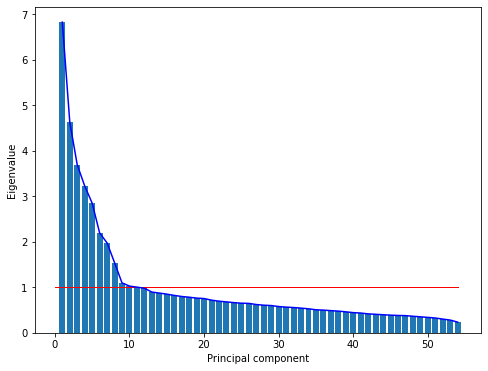

In [4]:
# 1. Z-score the data:
zscoredData = stats.zscore(dataset_pca)

# # 2. Run the PCA:
pca = PCA().fit(zscoredData)

# # 3a. Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude
eigVals = pca.explained_variance_

# # 3b. Loadings (eigenvectors): Weights per factor in terms of the original data. Where do the
# # principal components point, in terms of the 54 questions?
loadings = pca.components_

# # 3c. Rotated Data: Simply the transformed data - we had 1097 movies (rows) in
# # terms of 54 variables (columns), now we have 40 courses in terms of 54
# # factors ordered by decreasing eigenvalue
rotatedData = pca.fit_transform(zscoredData)

# # 4. For the purposes of this, you can think of eigenvalues in terms of 
# # (co)variance explained:
covarExplained = eigVals/sum(eigVals)*100

# #%% 5 Scree plot
numClasses = 54
plt.figure(figsize=(8,6))
plt.bar(np.linspace(1,54,54),eigVals)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.plot([0,numClasses],[1,1],color='red',linewidth=1) # Kaiser criterion line
plt.plot(np.linspace(1,numClasses,numClasses),eigVals,color='blue') 
plt.show()

In [90]:
# covariance explained by pca features 
sum(covarExplained[:8])

49.800883051059486

In [5]:
# Using elbow criterion
# Checking biggest drop point: First drop point is the biggest
# However, it also makes sense to select 8 features since 8th to 9th feature has second biggest drop point

drop_arr = []

for val1 in range(len(eigVals)):
    if val1 == len(eigVals)-1: continue
    
    drop_rate = (eigVals[val1] - eigVals[val1+1])/ eigVals[val1] * 100
    drop_arr.append(drop_rate)
    
drop_arr

[32.22773586042433,
 20.238792185484456,
 12.550631492471917,
 11.72401548745846,
 22.95045019161861,
 10.026580942666515,
 21.923353778204017,
 28.861073999780817,
 6.426572234368917,
 2.193268229856756,
 2.4971365215291654,
 8.532893921991029,
 2.4875192161876547,
 2.667562118834799,
 3.2879151907733197,
 2.944221620246428,
 1.9583388372422899,
 2.524017466959447,
 1.268226206481521,
 4.654074703851205,
 3.1909989919337303,
 2.2147081810980307,
 2.380030342036738,
 1.9283131989475681,
 0.6722490663497809,
 3.846308822870128,
 2.3271506554143397,
 1.2861488390031544,
 3.676588258673689,
 2.201803198343355,
 1.5849414692243213,
 2.3444242600031284,
 2.7914327729975685,
 3.975344055466965,
 1.5615427733411344,
 2.2157564931794425,
 2.224426170419343,
 3.216782546515236,
 3.9232915214434394,
 1.9617552863039702,
 4.221267651442634,
 2.301919109498265,
 2.2752685681569496,
 2.356022916345547,
 1.8137904259586453,
 0.8924294029216415,
 3.698806645211123,
 3.4541216508891868,
 3.48956462654

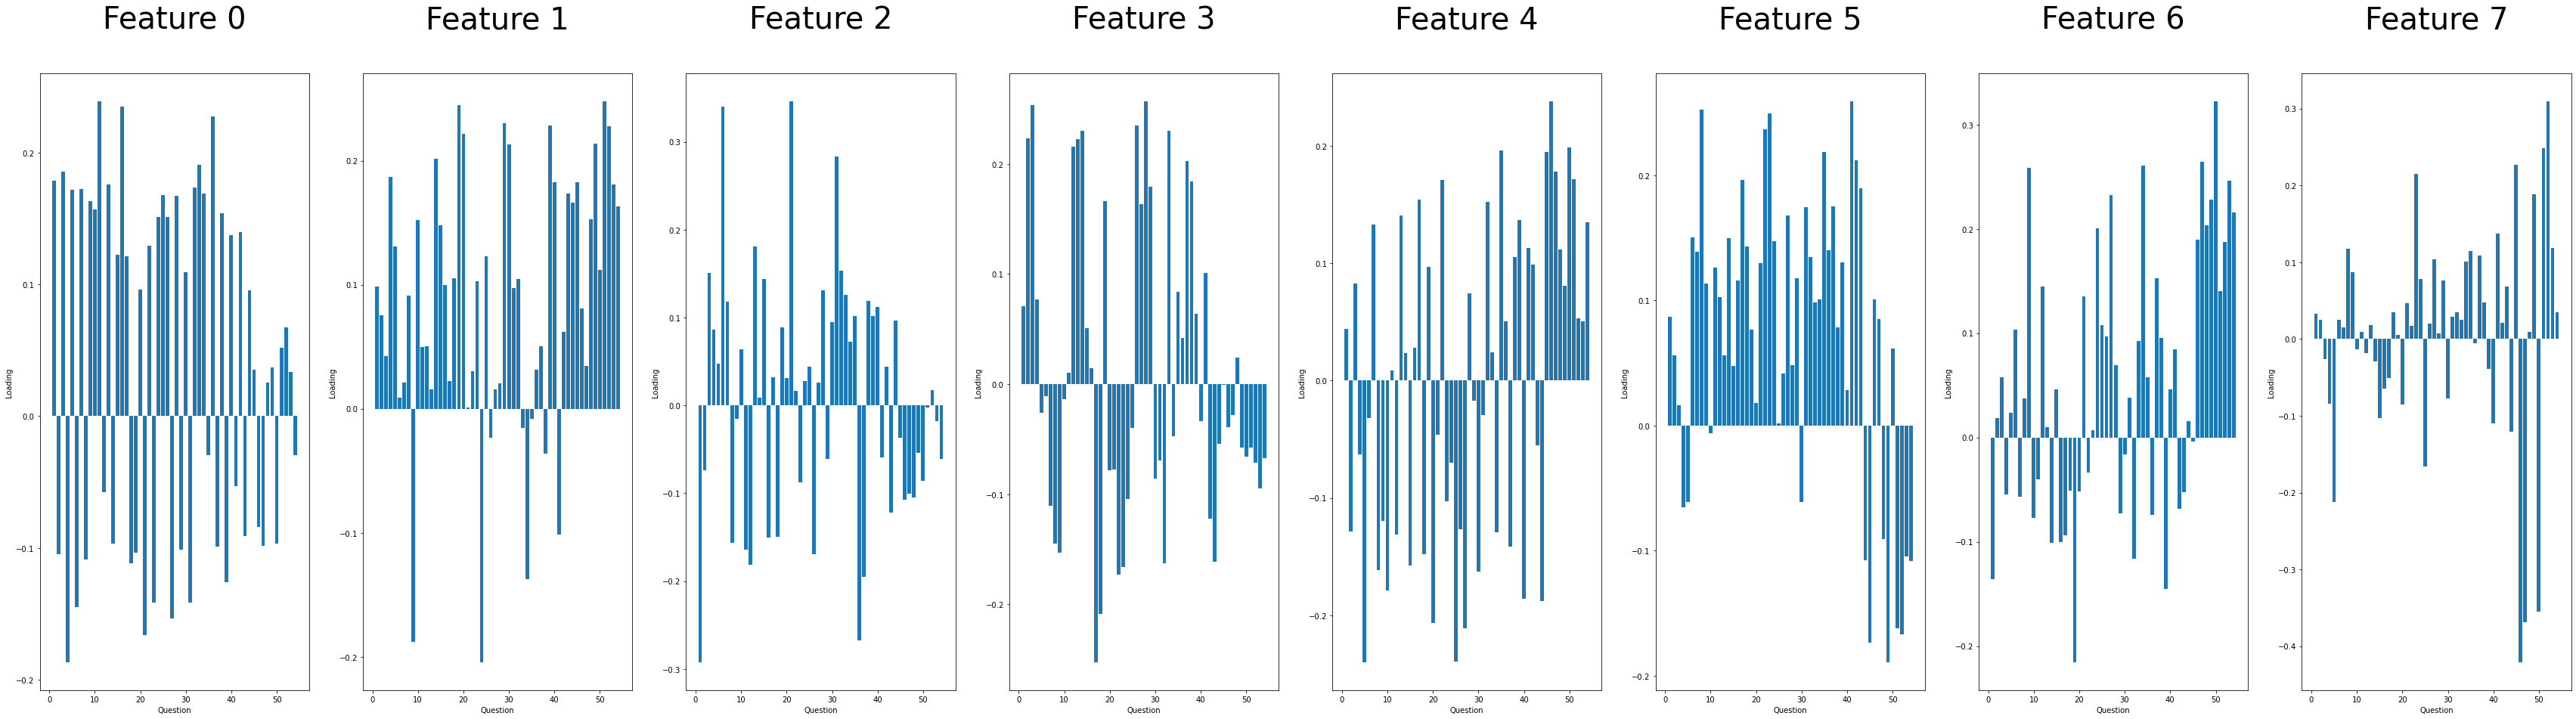

In [6]:
# looking at new 8 features to determine characteristic of the features
fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(60,15))


for i in range(8):    
    whichPrincipalComponent = i
    ax[i].set_title('Feature {}'.format(i), pad=60, fontdict = {'fontsize': 40})
    ax[i].bar(np.linspace(i1,54,54),loadings[whichPrincipalComponent,:]*-1)
    ax[i].set_xlabel('Question')
    ax[i].set_ylabel('Loading')

In [7]:
# Feature 0: Energetic
loadings_val = loadings[0,:]*-1
loadings_val_top3 = loadings_val.argsort()[::-1][:3]
loadings_val_bottom3 = loadings_val.argsort()[:3]

print('Top3: ', dataset_pca.columns[loadings_val_top3])
print()
print('Bottom3: ', dataset_pca.columns[loadings_val_bottom3])

Top3:  Index(['Is full of energy', 'Generates a lot of Enthusiasm',
       'is outgoing/sociable'],
      dtype='object')

Bottom3:  Index(['Is depressed/Blue', 'Tends to be quiet', 'Can be cold and aloof'], dtype='object')


In [8]:
# Feature 1: Emotional
loadings_val = loadings[1,:]*-1
loadings_val_top3 = loadings_val.argsort()[::-1][:3]
loadings_val_bottom3 = loadings_val.argsort()[:3]

print('Top3: ', dataset_pca.columns[loadings_val_top3])
print()
print('Bottom3: ', dataset_pca.columns[loadings_val_bottom3])

Top3:  Index(['The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared',
       'Worries a lot', 'Can be moody'],
      dtype='object')

Bottom3:  Index(['Is emotionally stable/not easily upset',
       'Is relaxed/handles stress well', 'Remains calm in tense situations'],
      dtype='object')


In [9]:
# Feature 2: Quiet
loadings_val = loadings[2,:]*-1
loadings_val_top3 = loadings_val.argsort()[::-1][:3]
loadings_val_bottom3 = loadings_val.argsort()[:3]

print('Top3: ', dataset_pca.columns[loadings_val_top3])
print()
print('Bottom3: ', dataset_pca.columns[loadings_val_bottom3])

Top3:  Index(['Tends to be quiet', 'Is reserved', 'Is sometimes shy/inhibited'], dtype='object')

Bottom3:  Index(['Is talkative', 'is outgoing/sociable', 'Is sometimes rude to others'], dtype='object')


In [10]:
# Feature 3: Persevere
loadings_val = loadings[3,:]*-1
loadings_val_top3 = loadings_val.argsort()[::-1][:3]
loadings_val_bottom3 = loadings_val.argsort()[:3]

print('Top3: ', dataset_pca.columns[loadings_val_top3])
print()
print('Bottom3: ', dataset_pca.columns[loadings_val_bottom3])

Top3:  Index(['Perseveres until the task is finished', 'Does a thorough job',
       'Has an assertive personality'],
      dtype='object')

Bottom3:  Index(['Has a forgiving nature', 'Tends to be disorganized',
       'Is generally trusting'],
      dtype='object')


In [11]:
# Feature 4: Uninventive
loadings_val = loadings[4,:]*-1
loadings_val_top3 = loadings_val.argsort()[::-1][:3]
loadings_val_bottom3 = loadings_val.argsort()[:3]

print('Top3: ', dataset_pca.columns[loadings_val_top3])
print()
print('Bottom3: ', dataset_pca.columns[loadings_val_bottom3])

Top3:  Index(['I have trouble following the story of a movie',
       'As a movie unfolds I start to have problems keeping track of events that happened earlier',
       'Prefers work that is routine'],
      dtype='object')

Bottom3:  Index(['Is original/comes up with new ideas', 'is inventive',
       'Can be cold and aloof'],
      dtype='object')


In [12]:
# Feature 5: Unartistic
loadings_val = loadings[5,:]*-1
loadings_val_top3 = loadings_val.argsort()[::-1][:3]
loadings_val_bottom3 = loadings_val.argsort()[:3]

print('Top3: ', dataset_pca.columns[loadings_val_top3])
print()
print('Bottom3: ', dataset_pca.columns[loadings_val_bottom3])

Top3:  Index(['Has few artistic interests', 'Can be somewhat careless',
       'Tends to be lazy'],
      dtype='object')

Bottom3:  Index(['When watching a movie I feel like the things on the screen are happening to me',
       'I have cried during a movie',
       'When watching a movie I get completely immersed in the alternative reality of the film'],
      dtype='object')


In [13]:
# Feature 6: Forgets easily
loadings_val = loadings[6,:]*-1
loadings_val_top3 = loadings_val.argsort()[::-1][:3]
loadings_val_bottom3 = loadings_val.argsort()[:3]

print('Top3: ', dataset_pca.columns[loadings_val_top3])
print()
print('Bottom3: ', dataset_pca.columns[loadings_val_bottom3])

Top3:  Index(['As a movie unfolds I start to have problems keeping track of events that happened earlier',
       'I have trouble remembering the story of a movie a couple of days after seeing it',
       'Remains calm in tense situations'],
      dtype='object')

Bottom3:  Index(['Worries a lot', 'Gets nervous easily', 'Is talkative'], dtype='object')


In [14]:
# Feature 7: Empathy
loadings_val = loadings[7,:]*-1
loadings_val_top3 = loadings_val.argsort()[::-1][:3]
loadings_val_bottom3 = loadings_val.argsort()[:3]

print('Top3: ', dataset_pca.columns[loadings_val_top3])
print()
print('Bottom3: ', dataset_pca.columns[loadings_val_bottom3])

Top3:  Index(['When watching a movie I get completely immersed in the alternative reality of the film',
       'The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared',
       'I have cried during a movie'],
      dtype='object')

Bottom3:  Index(['I have trouble following the story of a movie',
       'I have trouble remembering the story of a movie a couple of days after seeing it',
       'As a movie unfolds I start to have problems keeping track of events that happened earlier'],
      dtype='object')


## 2) Plot the data from columns 421-474 in the new coordinate system, where each dot represents a person, and the axes represent the factors you found in 1)
1). Hint: If you identified more than 2 meaningful factors, it is a good idea to create several 2D (X vs. Y) subplots for better interpretability.

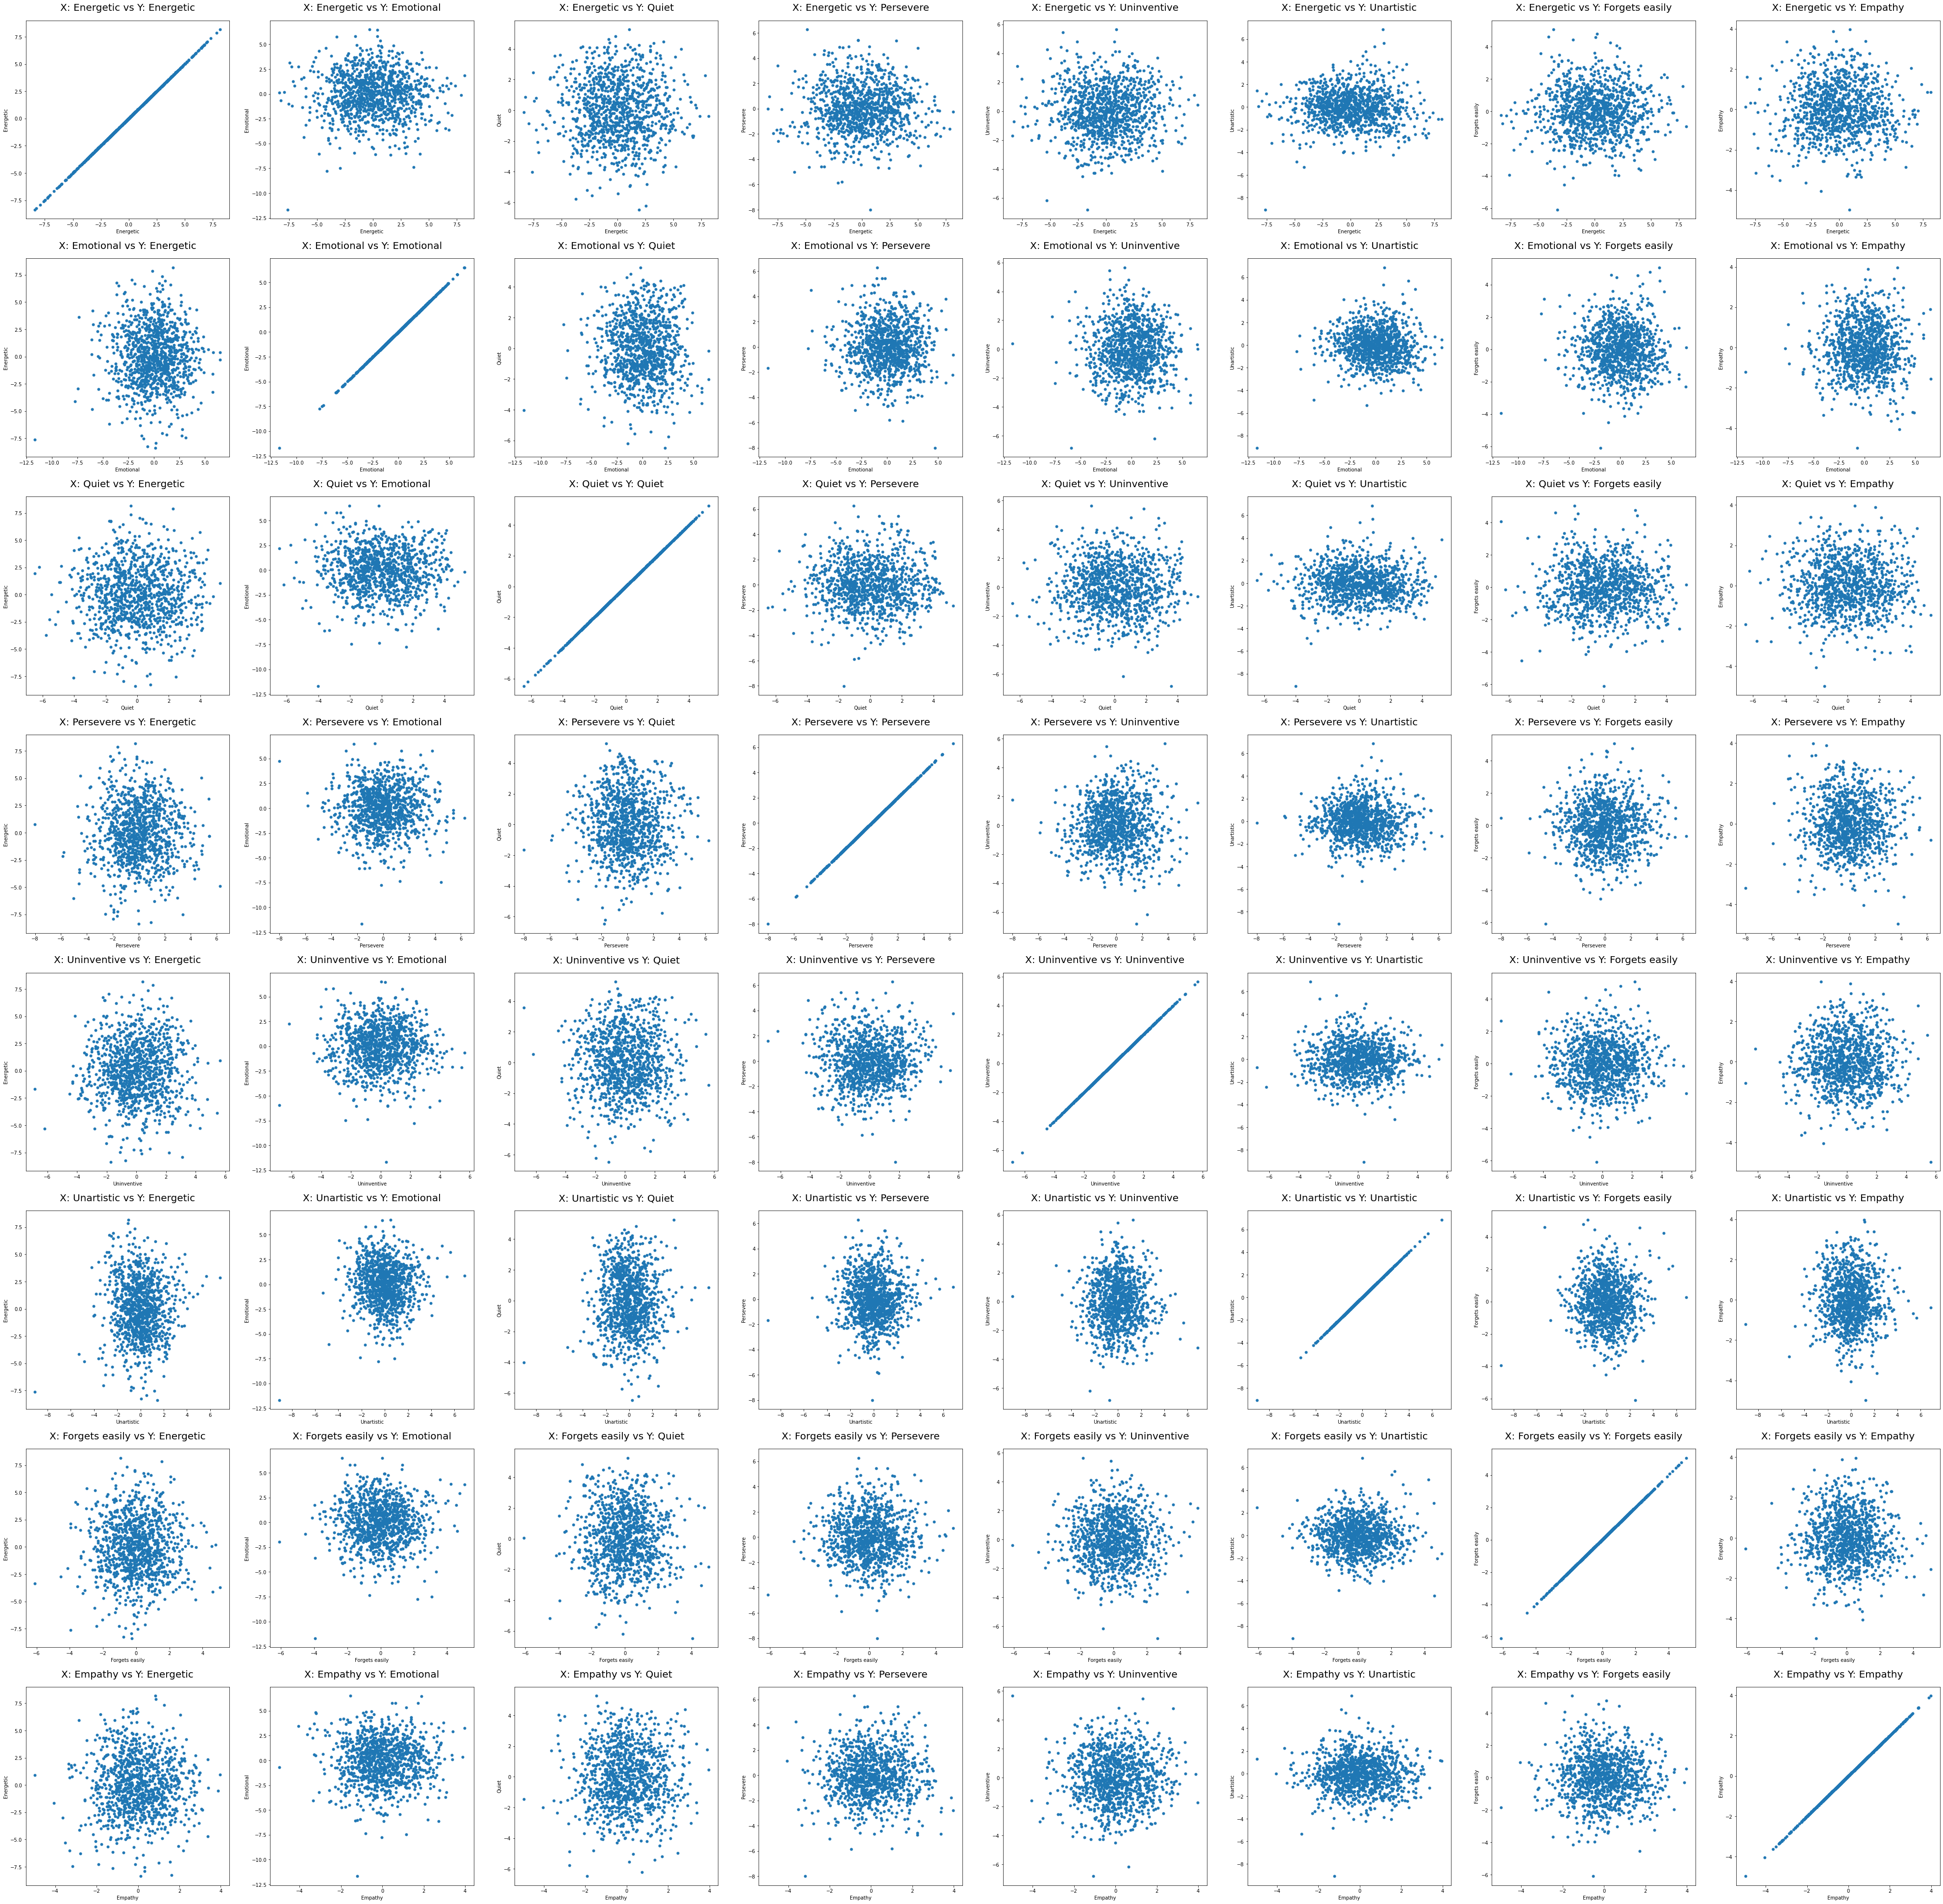

In [96]:
# Plotting the data as multiple subplots of 8 features 

f_names = ['Energetic', 'Emotional', 'Quiet', 'Persevere', 'Uninventive', 'Unartistic', 'Forgets easily', 'Empathy']

fig, ax = plt.subplots(nrows=8, ncols=8, figsize=(70,70))

for i in range(8):    
    for j in range(8):
        ax[i][j].set_title('X: {} vs Y: {}'.format(f_names[i], f_names[j]), pad=20, fontdict = {'fontsize': 20})
        ax[i][j].plot(rotatedData[:,i]*-1,rotatedData[:,j]*-1,'o',markersize=5)
        ax[i][j].set_xlabel(f_names[i])
        ax[i][j].set_ylabel(f_names[j])


## 3) Identify clusters in this new space. 
Use a method of your choice (e.g. kMeans, DBScan, hierarchical clustering) to do so. Determine the optimal number of clusters and identify which cluster a given user is part of.

### By using KMeans, I've selected optimal number of clusters as 6
- I chose optimal clusters as 6, since it has the peak silhouette scores
- Users are divided into:  
Cluster 0: Energetic  
Cluster 1: Lethargic + Emotional  
Cluster 2: Energetic + Emotionless  
Cluster 3: Neutral  
Cluster 4: Lethargic + Emotionless  
Cluster 5: Emotional

## Cluster: 6

In [16]:
# Transferring data into x-axis = pca1, y-axis = pca2
X = rotatedData[:,:2]*-1

In [52]:
# Defining KMeans function 
from sklearn.metrics import pairwise_distances_argmin

def KMeans(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

In [57]:
# Iterating by cluster number from 2 to 10

numClusters = 9
Q = np.empty([numClusters,1]) # init container to store sums
Q[:] = np.NaN # convert to NaN

for i in range(2, 11): # Loop through each cluster (from 2 to 10)
    centers, labels = KMeans(X, i)
    s = silhouette_samples(X,labels) # compute the mean silhouette coefficient of all samples
    # print(s.shape)
    Q[i-2] = sum(s) # take sum

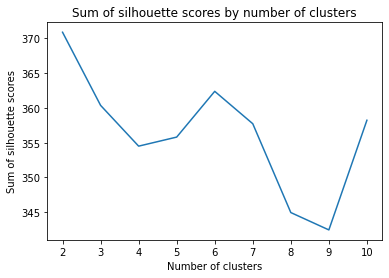

In [61]:
# I chose optimal clusters as 6, since it has the peak silhouette scores
plt.plot(np.linspace(2,10,numClusters),Q)
plt.title('Sum of silhouette scores by number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

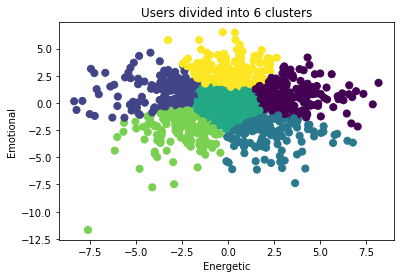

In [97]:
# Plotting 6 clusters
centers, labels = KMeans(X, 6)
plt.title('Users divided into 6 clusters')
plt.xlabel('Energetic')
plt.ylabel('Emotional')
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

In [64]:
new_space_df = pd.DataFrame(X, columns = ['Energetic', 'Emotional'])
new_space_df['cluster'] = labels

In [65]:
c_0 = new_space_df[new_space_df['cluster'] == 0]
c_1 = new_space_df[new_space_df['cluster'] == 1]
c_2 = new_space_df[new_space_df['cluster'] == 2]
c_3 = new_space_df[new_space_df['cluster'] == 3]
c_4 = new_space_df[new_space_df['cluster'] == 4]
c_5 = new_space_df[new_space_df['cluster'] == 5]

- Cluster 0: Energetic  
- Cluster 1: Lethargic + Emotional  
- Cluster 2: Energetic + Emotionless  
- Cluster 3: Neutral
- Cluster 4: Lethargic + Emotionless
- Cluster 5: Emotional

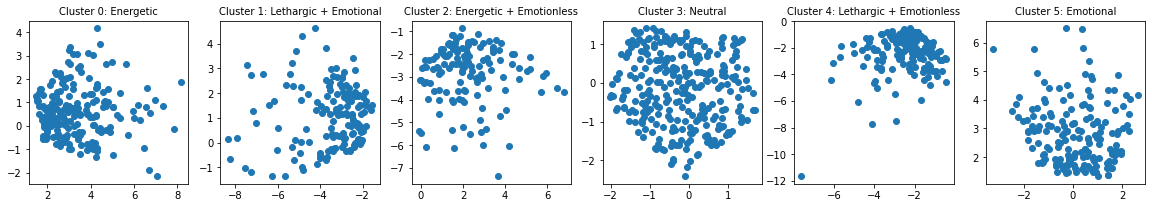

In [101]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(20,3))

ax[0].scatter(c_0['Energetic'], c_0['Emotional'])
ax[1].scatter(c_1['Energetic'], c_1['Emotional'])
ax[2].scatter(c_2['Energetic'], c_2['Emotional'])
ax[3].scatter(c_3['Energetic'], c_3['Emotional'])
ax[4].scatter(c_4['Energetic'], c_4['Emotional'])
ax[5].scatter(c_5['Energetic'], c_5['Emotional'])

ax[0].set_title('Cluster 0: Energetic', fontdict = {'fontsize': 10})
ax[1].set_title('Cluster 1: Lethargic + Emotional', fontdict = {'fontsize': 10})
ax[2].set_title('Cluster 2: Energetic + Emotionless', fontdict = {'fontsize': 10})
ax[3].set_title('Cluster 3: Neutral', fontdict = {'fontsize': 10})
ax[4].set_title('Cluster 4: Lethargic + Emotionless', fontdict = {'fontsize': 10})
ax[5].set_title('Cluster 5: Emotional', fontdict = {'fontsize': 10})

plt.show()

### 4) Use these principal components and/or clusters you identified to build a classification model of your choice (e.g. logistic regression, kNN, SVM, random forest), where you predict the movie ratings of all movies from the personality factors identified before. Make sure to use cross-validation methods to avoid overfitting and assess the accuracy of your model by stating its AUC.

### By using Logistic regression model, I got average auc score: 0.5936

- I've used 8 pca components as features, and 400 movie ratings as target values
- Since movie ratings are not binomial, I've transferred movie ratings into 0 or 1
- Assumption: If movie ratings are more or equal to 2.0, then it is a good rated movie(=1), else it is a bad rated movie(=0)


- I've chose logistic regression, since it can be easily interpreted and runs very fast
- Firstly, I've created logistic regression model without any cross-validation or hyper parameter tuning
- -> By iterating over 400 movies, I got average auc score: 0.6022, Average accuracy score: 0.9520


- Then, I used cross-validation method by using grid search cv, with having 5 folds, and optimizing its hyper parameter
- -> By iterating over 400 movies, I got average auc score: 0.5936, Average accuracy score: 0.9520


In [24]:
# recalling movie dataframe
movie_df = dataset.iloc[:, :400]

In [25]:
# fill N/A with median value
movie_df.fillna(movie_df.median(), inplace=True)

In [26]:
movie_df.head(3)

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II,Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,2.5,2.0,4.0,3.0,3.0,3.0,2.5,3.0,2.5,3.0,...,3.0,3.5,3.0,4.0,0.5,2.5,2.5,2.5,2.0,2.5
1,2.5,2.0,1.5,3.0,3.0,3.0,2.5,3.0,2.5,3.0,...,3.0,3.5,3.0,3.0,4.0,2.5,2.5,2.5,2.0,2.5
2,2.5,2.0,3.5,3.0,3.0,3.0,2.5,3.0,2.5,3.0,...,3.0,3.5,3.0,3.0,3.5,2.5,2.5,2.5,2.0,2.5


In [27]:
# In terms of target value, it should be binomial (0 or 1)
# Assumption: movie ratings can be classified as Good rating(1, rating >= 2.0) or Bad rating(0, rating < 2.0)
# Create a function that changes movie ratings into Good/bad rating

def good_bad_rating(movie_rating):
    
    if movie_rating >= 2.0 : movie_rating = 1
    else: movie_rating = 0       
        
    return movie_rating

for i in movie_df.columns:
    movie_df[i] = movie_df[i].apply(lambda x: good_bad_rating(x))

In [28]:
movie_df.head(3)

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II,Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
1,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [29]:
pca_features = rotatedData[:,:8]*-1
f_names = ['Energetic', 'Emotional', 'Quiet', 'Persevere', 'Uninventive', 'Unartistic', 'Forgets easily', 'Empathy']

pca_features_df = pd.DataFrame(pca_features, columns = f_names)

In [30]:
pca_features_df.head(3)

,Energetic,Emotional,Quiet,Persevere,Uninventive,Unartistic,Forgets easily,Empathy
0,-1.928670,-0.329341,2.153692,-1.029803,-3.636002,-1.041375,4.434094,0.729688
1,-1.691756,-1.123464,2.378172,-1.360154,-0.644381,0.006167,0.931741,2.245223
2,-0.066899,1.205525,-0.835202,-1.544950,1.108895,-0.428160,-0.105948,1.126989


In [31]:
movie_pca_df = pd.concat([movie_df, pca_features_df], axis=1)
movie_pca_df.head(3)

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II,Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,MacArthur (1977),Look Who's Talking (1989),Energetic,Emotional,Quiet,Persevere,Uninventive,Unartistic,Forgets easily,Empathy
0,1,1,1,1,1,1,1,1,1,1,...,1,1,-1.928670,-0.329341,2.153692,-1.029803,-3.636002,-1.041375,4.434094,0.729688
1,1,1,0,1,1,1,1,1,1,1,...,1,1,-1.691756,-1.123464,2.378172,-1.360154,-0.644381,0.006167,0.931741,2.245223
2,1,1,1,1,1,1,1,1,1,1,...,1,1,-0.066899,1.205525,-0.835202,-1.544950,1.108895,-0.428160,-0.105948,1.126989


In [32]:
movie_pca_df.iloc[:, -8:]

,Energetic,Emotional,Quiet,Persevere,Uninventive,Unartistic,Forgets easily,Empathy
0,-1.928670,-0.329341,2.153692,-1.029803,-3.636002,-1.041375,4.434094,0.729688
1,-1.691756,-1.123464,2.378172,-1.360154,-0.644381,0.006167,0.931741,2.245223
2,-0.066899,1.205525,-0.835202,-1.544950,1.108895,-0.428160,-0.105948,1.126989
3,2.124784,1.757723,1.484438,0.523270,-0.160660,-1.090135,-3.961333,-0.465579
4,-2.200519,1.430683,-1.823315,-0.238611,1.052301,-0.168581,-0.468084,0.882661
...,...,...,...,...,...,...,...,...
1092,-0.206179,2.286915,1.103734,0.503723,1.954170,-0.807242,0.224688,-0.344340
1093,1.376698,3.883337,-1.802312,0.107360,0.517518,4.929305,4.238875,-0.037386
1094,2.582740,1.496001,3.060909,1.135510,2.035339,-0.796130,0.065518,0.783899
1095,0.816692,1.988304,1.903812,-1.354913,-1.333744,2.982426,-1.168122,-1.773131


In [33]:
# Now conduct modeling: Run Logistic Regression
# Feature: pca features + clusters
# Target: movie ratings
from sklearn.metrics import roc_auc_score, accuracy_score

roc_auc_arr, accuracy_arr = [], []

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

for i in range(400):
    feature = movie_pca_df.iloc[:, -8:]
    target = movie_pca_df.iloc[:, i]

    X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=0)
    
    lr_clf = LogisticRegression()
    lr_clf.fit(X_train, y_train)
    lr_pred = lr_clf.predict(X_test)
    lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test, lr_pred_proba)
    roc_auc_arr.append(roc_auc)
    
    accuracy = accuracy_score(y_test, lr_pred)
    accuracy_arr.append(accuracy)


In [34]:
# averaging prediction scores 
print('Average auc score: {:.4f}, Average accuracy score: {:.4f}'.format(np.mean(roc_auc_arr), np.mean(accuracy_arr))) 

Average auc score: 0.6022, Average accuracy score: 0.9520


In [71]:
# Adding cross-validation function
# logistic regression(second trial) - adding hyper parameter tuning: 0.5936 as auc score
# Result seems to not improved
# Hyper parameter tuning: GridSearchCV
# Retrain by best hyper parameter

roc_auc_arr_v2, accuracy_arr_v2 = [], []

from sklearn.model_selection import GridSearchCV

for i in range(400):
    feature = movie_pca_df.iloc[:, -8:]
    target = movie_pca_df.iloc[:, i]

    X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=0)
    
    lr_clf = LogisticRegression()
    params={'penalty':['l2', 'l1'],
            'C':[0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 1, 5, 10]}

    # By setting refit=True, this model retrains with the best parameter
    grid_lr = GridSearchCV(lr_clf, param_grid=params, scoring='roc_auc', cv=5, refit=True)
    grid_lr.fit(X_train, y_train)
    pred = grid_lr.predict(X_test)
    pred_proba = grid_lr.predict_proba(X_test)[:, 1]
   
    roc_auc = roc_auc_score(y_test, pred_proba)
    roc_auc_arr_v2.append(roc_auc)
    
    accuracy = accuracy_score(y_test, pred)
    accuracy_arr_v2.append(accuracy)

In [72]:
# averaging prediction scores 
print('Average auc score: {:.4f}, Average accuracy score: {:.4f}'.format(np.mean(roc_auc_arr_v2), np.mean(accuracy_arr_v2))) 

Average auc score: 0.5936, Average accuracy score: 0.9520


### 5) Create a neural network model of your choice to predict movie ratings, using information from all 477 columns. Make sure to comment on the accuracy of this model.

### By using neural network model, I got average accuracy of this model of 0.9521

- I've used data in columns 421-474 as features, and 400 movie ratings as target values
- Since movie ratings are not binomial, I've transferred movie ratings into 0 or 1
- Assumption: If movie ratings are more or equal to 2.0, then it is a good rated movie(=1), else it is a bad rated movie(=0)


- Firstly, I've created CNN class: (x * 128) * (128 * x)
- Then I've initializing CNN model: (x * 128) * (128 * 16)
- Train by 16 indexes: (16 * 128) * (128 * 16)
- Predict on test data and calculate accuracy of this model      

- -> By iterating over 400 movies, I got average accuracy score: 0.9521

In [80]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from tqdm import tqdm

dataset_v2 = pd.read_csv('./movieReplicationSet.csv')

dataset_v2.fillna(dataset_v2.median(), inplace=True)

movie_feature_df = dataset_v2.iloc[:, 420:474]
movie_target_df = dataset_v2.iloc[:, :400]

In [81]:
movie_feature_df.shape

(1097, 54)

In [82]:
# In terms of target value, it should be binomial (0 or 1)
# Assumption: movie ratings can be classified as Good rating(1, rating >= 2.0) or Bad rating(0, rating < 2.0)
# Create a function that changes movie ratings into Good/bad rating

def good_bad_rating(movie_rating):
    
    if movie_rating >= 2.0 : movie_rating = 1
    else: movie_rating = 0       
        
    return movie_rating

for i in movie_target_df.columns:
    movie_target_df[i] = movie_target_df[i].apply(lambda x: good_bad_rating(x))

In [83]:
!pip install torch 

In [84]:
!pip install tqdm

In [85]:
# creating CNN class that has (x, 128), and (128, x) matrix
class myCNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(myCNNModel, self).__init__()
        
        # (x, 128) 
        self.conv1=nn.Conv2d(1, 32, kernel_size=(3,3), stride=1, padding=1)
        self.conv2=nn.Conv2d(32, 64, kernel_size=(3,3), stride=1, padding=1)
        
        # (128, x)
        self.linear=nn.Linear(128, num_classes)
        self.maxpool=nn.MaxPool2d(kernel_size=(2,2))
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = x.view(x.size(0),-1)
        x = self.linear(x)
        return x

In [86]:
# iterate by targeting each movies 

accuracy_arr = []

for i in range(400):
    X_train, X_test, y_train, y_test = train_test_split(movie_feature_df, movie_target_df.iloc[:, i], test_size=0.2, random_state=0)

    train_data = X_train.values.reshape(-1,9,6)
    train_labels = y_train.values
#     print(train_data.shape, train_labels.shape)

    test_data = X_test.values.reshape(-1,9,6)
    test_labels = y_test.values
#     print(test_data.shape, test_labels.shape)
    
    # initializing model (128, 16)
    model=myCNNModel(16)
    model.train()
    loss_criterion=CrossEntropyLoss()
    optimizer=Adam(model.parameters(), lr=1e-2)
    
    # Creating tensors
    train_data_tensor = torch.FloatTensor(train_data).unsqueeze(1)
    train_label_tensor = torch.LongTensor(train_labels)
    test_data_tensor = torch.FloatTensor(test_data).unsqueeze(1)
    test_label_tensor = torch.LongTensor(test_labels)
#     print(train_data_tensor.size(), train_label_tensor.size(), test_data_tensor.size(), test_label_tensor.size())
    
    epochs=3
    for epoch in range(epochs):
        loss_arr=[]
        # (16, 128)
        for b_idx in range(0, len(train_data_tensor), 16):
            optimizer.zero_grad()
            images = train_data_tensor[b_idx:b_idx+16]
            labels = train_label_tensor[b_idx:b_idx+16]
            output = model(images)
            loss = loss_criterion(output, labels)
            loss.backward()
            optimizer.step()
            loss_arr.append(loss.item())
#         print("Loss for Epoch: %d: %.3f" % (epoch, np.average(loss_arr)))
        
    model.eval()
    test_outputs=[]
    for img in tqdm(test_data_tensor):
        out=model(img.unsqueeze(0))
        test_outputs.append(np.argmax(out.detach().numpy(), axis=-1))

    test_outputs=np.squeeze(np.stack(test_outputs))
    acc=np.sum(test_outputs==test_labels)/len(test_outputs)
    print('{}th movie: Accuracy on Test Data: {:.3f}'.format(i, 100.0*acc))
    accuracy_arr.append(acc)

100%|██████████| 220/220 [00:00<00:00, 4613.23it/s]


0th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5543.22it/s]


1th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5594.85it/s]


2th movie: Accuracy on Test Data: 93.636


100%|██████████| 220/220 [00:00<00:00, 5437.74it/s]


3th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5499.84it/s]


4th movie: Accuracy on Test Data: 90.909


100%|██████████| 220/220 [00:00<00:00, 5418.46it/s]


5th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5323.64it/s]


6th movie: Accuracy on Test Data: 95.000


100%|██████████| 220/220 [00:00<00:00, 5381.61it/s]


7th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5427.12it/s]


8th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5517.37it/s]


9th movie: Accuracy on Test Data: 90.455


100%|██████████| 220/220 [00:00<00:00, 5436.69it/s]


10th movie: Accuracy on Test Data: 89.545


100%|██████████| 220/220 [00:00<00:00, 5488.20it/s]


11th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5544.52it/s]


12th movie: Accuracy on Test Data: 88.182


100%|██████████| 220/220 [00:00<00:00, 5495.32it/s]


13th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5241.21it/s]


14th movie: Accuracy on Test Data: 84.091


100%|██████████| 220/220 [00:00<00:00, 5407.50it/s]


15th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5593.59it/s]


16th movie: Accuracy on Test Data: 93.182


100%|██████████| 220/220 [00:00<00:00, 5514.30it/s]


17th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5601.95it/s]


18th movie: Accuracy on Test Data: 88.636


100%|██████████| 220/220 [00:00<00:00, 5477.15it/s]


19th movie: Accuracy on Test Data: 93.182


100%|██████████| 220/220 [00:00<00:00, 5246.96it/s]


20th movie: Accuracy on Test Data: 94.091


100%|██████████| 220/220 [00:00<00:00, 5520.01it/s]


21th movie: Accuracy on Test Data: 91.364


100%|██████████| 220/220 [00:00<00:00, 5634.99it/s]


22th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5636.68it/s]


23th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5585.20it/s]


24th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5521.13it/s]


25th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5539.49it/s]


26th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5620.13it/s]


27th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5570.36it/s]


28th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5428.24it/s]


29th movie: Accuracy on Test Data: 92.273


100%|██████████| 220/220 [00:00<00:00, 5274.74it/s]


30th movie: Accuracy on Test Data: 85.909


100%|██████████| 220/220 [00:00<00:00, 5650.17it/s]


31th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5599.80it/s]


32th movie: Accuracy on Test Data: 90.000


100%|██████████| 220/220 [00:00<00:00, 5620.41it/s]


33th movie: Accuracy on Test Data: 93.636


100%|██████████| 220/220 [00:00<00:00, 5681.06it/s]


34th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5620.71it/s]


35th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5569.32it/s]


36th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5676.70it/s]


37th movie: Accuracy on Test Data: 93.636


100%|██████████| 220/220 [00:00<00:00, 5501.09it/s]


38th movie: Accuracy on Test Data: 89.091


100%|██████████| 220/220 [00:00<00:00, 5615.41it/s]


39th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5642.30it/s]


40th movie: Accuracy on Test Data: 91.818


100%|██████████| 220/220 [00:00<00:00, 5560.32it/s]


41th movie: Accuracy on Test Data: 90.455


100%|██████████| 220/220 [00:00<00:00, 5522.09it/s]


42th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5676.38it/s]


43th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5028.89it/s]


44th movie: Accuracy on Test Data: 90.909


100%|██████████| 220/220 [00:00<00:00, 5121.19it/s]


45th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5475.37it/s]


46th movie: Accuracy on Test Data: 89.545


100%|██████████| 220/220 [00:00<00:00, 5438.96it/s]


47th movie: Accuracy on Test Data: 87.727


100%|██████████| 220/220 [00:00<00:00, 5621.16it/s]


48th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5550.36it/s]


49th movie: Accuracy on Test Data: 92.727


100%|██████████| 220/220 [00:00<00:00, 5681.83it/s]


50th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5715.16it/s]


51th movie: Accuracy on Test Data: 90.455


100%|██████████| 220/220 [00:00<00:00, 5747.55it/s]


52th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5475.20it/s]


53th movie: Accuracy on Test Data: 91.364


100%|██████████| 220/220 [00:00<00:00, 5355.93it/s]


54th movie: Accuracy on Test Data: 93.636


100%|██████████| 220/220 [00:00<00:00, 5637.85it/s]


55th movie: Accuracy on Test Data: 93.182


100%|██████████| 220/220 [00:00<00:00, 5615.51it/s]


56th movie: Accuracy on Test Data: 95.000


100%|██████████| 220/220 [00:00<00:00, 5642.78it/s]


57th movie: Accuracy on Test Data: 87.273


100%|██████████| 220/220 [00:00<00:00, 5491.30it/s]


58th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5720.83it/s]


59th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5695.93it/s]


60th movie: Accuracy on Test Data: 95.000


100%|██████████| 220/220 [00:00<00:00, 5621.71it/s]


61th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5638.44it/s]


62th movie: Accuracy on Test Data: 95.000


100%|██████████| 220/220 [00:00<00:00, 5617.70it/s]


63th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5507.29it/s]


64th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5552.86it/s]


65th movie: Accuracy on Test Data: 94.091


100%|██████████| 220/220 [00:00<00:00, 5655.33it/s]


66th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5655.40it/s]


67th movie: Accuracy on Test Data: 94.545


100%|██████████| 220/220 [00:00<00:00, 5325.95it/s]


68th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5686.21it/s]


69th movie: Accuracy on Test Data: 95.000


100%|██████████| 220/220 [00:00<00:00, 4802.05it/s]


70th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5485.19it/s]


71th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5502.07it/s]


72th movie: Accuracy on Test Data: 94.545


100%|██████████| 220/220 [00:00<00:00, 4860.07it/s]


73th movie: Accuracy on Test Data: 95.000


100%|██████████| 220/220 [00:00<00:00, 5495.45it/s]


74th movie: Accuracy on Test Data: 89.091


100%|██████████| 220/220 [00:00<00:00, 5275.79it/s]


75th movie: Accuracy on Test Data: 85.909


100%|██████████| 220/220 [00:00<00:00, 5725.27it/s]


76th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5703.01it/s]


77th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 4789.81it/s]


78th movie: Accuracy on Test Data: 93.182


100%|██████████| 220/220 [00:00<00:00, 5540.73it/s]


79th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5602.08it/s]


80th movie: Accuracy on Test Data: 84.545


100%|██████████| 220/220 [00:00<00:00, 5620.88it/s]


81th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5768.83it/s]


82th movie: Accuracy on Test Data: 91.364


100%|██████████| 220/220 [00:00<00:00, 5694.18it/s]


83th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5737.51it/s]


84th movie: Accuracy on Test Data: 84.091


100%|██████████| 220/220 [00:00<00:00, 5738.87it/s]


85th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5773.81it/s]


86th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5729.03it/s]


87th movie: Accuracy on Test Data: 93.636


100%|██████████| 220/220 [00:00<00:00, 5730.64it/s]


88th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5742.80it/s]


89th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5762.16it/s]


90th movie: Accuracy on Test Data: 94.545


100%|██████████| 220/220 [00:00<00:00, 5779.59it/s]


91th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5784.30it/s]


92th movie: Accuracy on Test Data: 95.000


100%|██████████| 220/220 [00:00<00:00, 5773.52it/s]


93th movie: Accuracy on Test Data: 85.000


100%|██████████| 220/220 [00:00<00:00, 5726.12it/s]


94th movie: Accuracy on Test Data: 93.636


100%|██████████| 220/220 [00:00<00:00, 5774.86it/s]


95th movie: Accuracy on Test Data: 94.545


100%|██████████| 220/220 [00:00<00:00, 5750.56it/s]


96th movie: Accuracy on Test Data: 95.000


100%|██████████| 220/220 [00:00<00:00, 5766.56it/s]


97th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5719.62it/s]


98th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5721.43it/s]


99th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5784.45it/s]


100th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5763.21it/s]


101th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5772.76it/s]


102th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5691.82it/s]


103th movie: Accuracy on Test Data: 88.182


100%|██████████| 220/220 [00:00<00:00, 5722.89it/s]


104th movie: Accuracy on Test Data: 95.000


100%|██████████| 220/220 [00:00<00:00, 5318.52it/s]


105th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 4407.57it/s]


106th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5372.43it/s]


107th movie: Accuracy on Test Data: 98.636


100%|██████████| 220/220 [00:00<00:00, 5491.23it/s]


108th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5621.16it/s]


109th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5560.76it/s]


110th movie: Accuracy on Test Data: 90.455


100%|██████████| 220/220 [00:00<00:00, 5709.57it/s]


111th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5765.04it/s]


112th movie: Accuracy on Test Data: 95.000


100%|██████████| 220/220 [00:00<00:00, 5718.88it/s]


113th movie: Accuracy on Test Data: 92.727


100%|██████████| 220/220 [00:00<00:00, 5373.62it/s]


114th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5607.80it/s]


115th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 3781.30it/s]


116th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5083.16it/s]


117th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5567.64it/s]


118th movie: Accuracy on Test Data: 99.091


100%|██████████| 220/220 [00:00<00:00, 5596.68it/s]


119th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5332.78it/s]


120th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5745.19it/s]


121th movie: Accuracy on Test Data: 94.545


100%|██████████| 220/220 [00:00<00:00, 5741.58it/s]


122th movie: Accuracy on Test Data: 98.636


100%|██████████| 220/220 [00:00<00:00, 5698.89it/s]


123th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5755.41it/s]


124th movie: Accuracy on Test Data: 93.636


100%|██████████| 220/220 [00:00<00:00, 5784.41it/s]


125th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5644.06it/s]


126th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5470.72it/s]


127th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5746.70it/s]


128th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5809.50it/s]


129th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5764.61it/s]


130th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5728.86it/s]


131th movie: Accuracy on Test Data: 93.636


100%|██████████| 220/220 [00:00<00:00, 5771.68it/s]


132th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5423.27it/s]


133th movie: Accuracy on Test Data: 98.636


100%|██████████| 220/220 [00:00<00:00, 5526.82it/s]


134th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5653.64it/s]


135th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5713.53it/s]


136th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5751.64it/s]


137th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5719.06it/s]


138th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5688.59it/s]


139th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5767.78it/s]


140th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5735.44it/s]


141th movie: Accuracy on Test Data: 94.091


100%|██████████| 220/220 [00:00<00:00, 5732.63it/s]


142th movie: Accuracy on Test Data: 91.364


100%|██████████| 220/220 [00:00<00:00, 5741.72it/s]


143th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5726.05it/s]


144th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5699.31it/s]


145th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 4958.90it/s]


146th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5537.37it/s]


147th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5714.88it/s]


148th movie: Accuracy on Test Data: 94.091


100%|██████████| 220/220 [00:00<00:00, 5713.85it/s]


149th movie: Accuracy on Test Data: 91.818


100%|██████████| 220/220 [00:00<00:00, 5712.93it/s]


150th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5715.76it/s]


151th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5724.56it/s]


152th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5761.98it/s]


153th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5544.19it/s]


154th movie: Accuracy on Test Data: 87.273


100%|██████████| 220/220 [00:00<00:00, 5736.80it/s]


155th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5783.40it/s]


156th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5771.10it/s]


157th movie: Accuracy on Test Data: 92.273


100%|██████████| 220/220 [00:00<00:00, 5763.67it/s]


158th movie: Accuracy on Test Data: 87.273


100%|██████████| 220/220 [00:00<00:00, 5764.47it/s]


159th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5761.26it/s]


160th movie: Accuracy on Test Data: 92.727


100%|██████████| 220/220 [00:00<00:00, 5739.05it/s]


161th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5737.55it/s]


162th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5750.10it/s]


163th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5763.67it/s]


164th movie: Accuracy on Test Data: 98.636


100%|██████████| 220/220 [00:00<00:00, 5773.09it/s]


165th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5736.05it/s]


166th movie: Accuracy on Test Data: 92.727


100%|██████████| 220/220 [00:00<00:00, 5776.99it/s]


167th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5768.68it/s]


168th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5761.87it/s]


169th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5767.89it/s]


170th movie: Accuracy on Test Data: 88.636


100%|██████████| 220/220 [00:00<00:00, 5704.63it/s]


171th movie: Accuracy on Test Data: 93.182


100%|██████████| 220/220 [00:00<00:00, 5773.88it/s]


172th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5735.91it/s]


173th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5727.68it/s]


174th movie: Accuracy on Test Data: 95.000


100%|██████████| 220/220 [00:00<00:00, 5765.33it/s]


175th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5806.76it/s]


176th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5786.73it/s]


177th movie: Accuracy on Test Data: 94.091


100%|██████████| 220/220 [00:00<00:00, 5774.42it/s]


178th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5754.33it/s]


179th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5785.07it/s]


180th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5748.63it/s]


181th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5602.80it/s]


182th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5761.91it/s]


183th movie: Accuracy on Test Data: 88.182


100%|██████████| 220/220 [00:00<00:00, 5796.95it/s]


184th movie: Accuracy on Test Data: 90.455


100%|██████████| 220/220 [00:00<00:00, 5755.58it/s]


185th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5357.21it/s]


186th movie: Accuracy on Test Data: 90.909


100%|██████████| 220/220 [00:00<00:00, 5247.86it/s]


187th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5581.21it/s]


188th movie: Accuracy on Test Data: 92.273


100%|██████████| 220/220 [00:00<00:00, 5706.29it/s]


189th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5750.46it/s]


190th movie: Accuracy on Test Data: 88.636


100%|██████████| 220/220 [00:00<00:00, 5724.56it/s]


191th movie: Accuracy on Test Data: 90.455


100%|██████████| 220/220 [00:00<00:00, 5446.51it/s]


192th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5698.89it/s]


193th movie: Accuracy on Test Data: 93.182


100%|██████████| 220/220 [00:00<00:00, 5700.97it/s]


194th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5762.31it/s]


195th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5578.78it/s]


196th movie: Accuracy on Test Data: 98.636


100%|██████████| 220/220 [00:00<00:00, 5572.41it/s]


197th movie: Accuracy on Test Data: 95.000


100%|██████████| 220/220 [00:00<00:00, 5735.12it/s]


198th movie: Accuracy on Test Data: 94.091


100%|██████████| 220/220 [00:00<00:00, 5400.63it/s]


199th movie: Accuracy on Test Data: 94.091


100%|██████████| 220/220 [00:00<00:00, 5727.22it/s]


200th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 4886.73it/s]


201th movie: Accuracy on Test Data: 94.545


100%|██████████| 220/220 [00:00<00:00, 5537.63it/s]


202th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5770.31it/s]


203th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5695.79it/s]


204th movie: Accuracy on Test Data: 90.909


100%|██████████| 220/220 [00:00<00:00, 5724.52it/s]


205th movie: Accuracy on Test Data: 94.091


100%|██████████| 220/220 [00:00<00:00, 5773.52it/s]


206th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5730.49it/s]


207th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5646.82it/s]


208th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 4955.76it/s]


209th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5771.68it/s]


210th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5406.99it/s]


211th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5759.21it/s]


212th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5459.46it/s]


213th movie: Accuracy on Test Data: 94.545


100%|██████████| 220/220 [00:00<00:00, 5705.23it/s]


214th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5698.89it/s]


215th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5617.84it/s]


216th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5698.15it/s]


217th movie: Accuracy on Test Data: 91.364


100%|██████████| 220/220 [00:00<00:00, 5633.51it/s]


218th movie: Accuracy on Test Data: 95.000


100%|██████████| 220/220 [00:00<00:00, 5741.58it/s]


219th movie: Accuracy on Test Data: 91.364


100%|██████████| 220/220 [00:00<00:00, 5654.33it/s]


220th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5730.81it/s]


221th movie: Accuracy on Test Data: 92.727


100%|██████████| 220/220 [00:00<00:00, 5762.02it/s]


222th movie: Accuracy on Test Data: 94.545


100%|██████████| 220/220 [00:00<00:00, 5729.89it/s]


223th movie: Accuracy on Test Data: 94.545


100%|██████████| 220/220 [00:00<00:00, 5673.59it/s]


224th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5785.54it/s]


225th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5763.39it/s]


226th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5739.94it/s]


227th movie: Accuracy on Test Data: 99.091


100%|██████████| 220/220 [00:00<00:00, 5700.82it/s]


228th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5745.16it/s]


229th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5763.85it/s]


230th movie: Accuracy on Test Data: 94.091


100%|██████████| 220/220 [00:00<00:00, 5756.88it/s]


231th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5715.34it/s]


232th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5768.72it/s]


233th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5738.87it/s]


234th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5759.32it/s]


235th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5755.69it/s]


236th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5781.69it/s]


237th movie: Accuracy on Test Data: 90.000


100%|██████████| 220/220 [00:00<00:00, 5708.23it/s]


238th movie: Accuracy on Test Data: 85.909


100%|██████████| 220/220 [00:00<00:00, 5727.08it/s]


239th movie: Accuracy on Test Data: 92.727


100%|██████████| 220/220 [00:00<00:00, 5761.30it/s]


240th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5738.44it/s]


241th movie: Accuracy on Test Data: 91.818


100%|██████████| 220/220 [00:00<00:00, 5773.23it/s]


242th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5576.69it/s]


243th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5750.60it/s]


244th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5779.16it/s]


245th movie: Accuracy on Test Data: 92.727


100%|██████████| 220/220 [00:00<00:00, 5734.52it/s]


246th movie: Accuracy on Test Data: 91.364


100%|██████████| 220/220 [00:00<00:00, 5765.15it/s]


247th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5768.36it/s]


248th movie: Accuracy on Test Data: 84.091


100%|██████████| 220/220 [00:00<00:00, 5663.53it/s]


249th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5739.30it/s]


250th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5749.38it/s]


251th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5718.13it/s]


252th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5754.33it/s]


253th movie: Accuracy on Test Data: 86.364


100%|██████████| 220/220 [00:00<00:00, 5775.14it/s]


254th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5720.37it/s]


255th movie: Accuracy on Test Data: 85.455


100%|██████████| 220/220 [00:00<00:00, 5724.84it/s]


256th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5774.46it/s]


257th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5744.41it/s]


258th movie: Accuracy on Test Data: 93.182


100%|██████████| 220/220 [00:00<00:00, 5697.83it/s]


259th movie: Accuracy on Test Data: 90.455


100%|██████████| 220/220 [00:00<00:00, 5789.75it/s]


260th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5736.62it/s]


261th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5767.64it/s]


262th movie: Accuracy on Test Data: 88.182


100%|██████████| 220/220 [00:00<00:00, 5748.63it/s]


263th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5760.36it/s]


264th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5776.88it/s]


265th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5699.77it/s]


266th movie: Accuracy on Test Data: 98.636


100%|██████████| 220/220 [00:00<00:00, 5742.33it/s]


267th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5780.35it/s]


268th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5738.26it/s]


269th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5748.34it/s]


270th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5792.66it/s]


271th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5774.28it/s]


272th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5755.84it/s]


273th movie: Accuracy on Test Data: 88.182


100%|██████████| 220/220 [00:00<00:00, 5745.19it/s]


274th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5739.80it/s]


275th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5714.13it/s]


276th movie: Accuracy on Test Data: 93.636


100%|██████████| 220/220 [00:00<00:00, 5751.96it/s]


277th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5724.84it/s]


278th movie: Accuracy on Test Data: 95.000


100%|██████████| 220/220 [00:00<00:00, 5798.30it/s]


279th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5773.48it/s]


280th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5757.67it/s]


281th movie: Accuracy on Test Data: 95.000


100%|██████████| 220/220 [00:00<00:00, 5789.13it/s]


282th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5770.52it/s]


283th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5768.39it/s]


284th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5752.82it/s]


285th movie: Accuracy on Test Data: 91.364


100%|██████████| 220/220 [00:00<00:00, 5764.93it/s]


286th movie: Accuracy on Test Data: 87.727


100%|██████████| 220/220 [00:00<00:00, 5770.09it/s]


287th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5752.10it/s]


288th movie: Accuracy on Test Data: 87.273


100%|██████████| 220/220 [00:00<00:00, 5773.66it/s]


289th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5766.09it/s]


290th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5779.12it/s]


291th movie: Accuracy on Test Data: 95.000


100%|██████████| 220/220 [00:00<00:00, 5694.46it/s]


292th movie: Accuracy on Test Data: 93.636


100%|██████████| 220/220 [00:00<00:00, 5750.53it/s]


293th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5633.20it/s]


294th movie: Accuracy on Test Data: 94.545


100%|██████████| 220/220 [00:00<00:00, 5736.05it/s]


295th movie: Accuracy on Test Data: 93.636


100%|██████████| 220/220 [00:00<00:00, 5753.58it/s]


296th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5404.75it/s]


297th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5579.66it/s]


298th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5416.96it/s]


299th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5522.92it/s]


300th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5606.37it/s]


301th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5342.54it/s]


302th movie: Accuracy on Test Data: 95.000


100%|██████████| 220/220 [00:00<00:00, 5155.85it/s]


303th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5366.90it/s]


304th movie: Accuracy on Test Data: 98.636


100%|██████████| 220/220 [00:00<00:00, 5605.69it/s]


305th movie: Accuracy on Test Data: 99.091


100%|██████████| 220/220 [00:00<00:00, 5612.24it/s]


306th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5581.04it/s]


307th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5534.44it/s]


308th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5263.91it/s]


309th movie: Accuracy on Test Data: 98.636


100%|██████████| 220/220 [00:00<00:00, 5384.75it/s]


310th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5645.40it/s]


311th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5608.82it/s]


312th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5387.39it/s]


313th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5574.13it/s]


314th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5328.93it/s]


315th movie: Accuracy on Test Data: 92.273


100%|██████████| 220/220 [00:00<00:00, 5574.26it/s]


316th movie: Accuracy on Test Data: 94.091


100%|██████████| 220/220 [00:00<00:00, 5347.46it/s]


317th movie: Accuracy on Test Data: 91.364


100%|██████████| 220/220 [00:00<00:00, 5451.07it/s]


318th movie: Accuracy on Test Data: 94.091


100%|██████████| 220/220 [00:00<00:00, 5502.20it/s]


319th movie: Accuracy on Test Data: 93.182


100%|██████████| 220/220 [00:00<00:00, 5529.30it/s]


320th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5445.28it/s]


321th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5447.86it/s]


322th movie: Accuracy on Test Data: 93.636


100%|██████████| 220/220 [00:00<00:00, 5421.26it/s]


323th movie: Accuracy on Test Data: 98.636


100%|██████████| 220/220 [00:00<00:00, 5517.77it/s]


324th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5055.37it/s]


325th movie: Accuracy on Test Data: 95.000


100%|██████████| 220/220 [00:00<00:00, 5357.77it/s]


326th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5472.09it/s]


327th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5496.57it/s]


328th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5395.58it/s]


329th movie: Accuracy on Test Data: 95.000


100%|██████████| 220/220 [00:00<00:00, 5462.04it/s]


330th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5514.47it/s]


331th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5568.34it/s]


332th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5593.15it/s]


333th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5604.36it/s]


334th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5542.36it/s]


335th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5652.87it/s]


336th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5595.83it/s]


337th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5667.14it/s]


338th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5640.47it/s]


339th movie: Accuracy on Test Data: 98.636


100%|██████████| 220/220 [00:00<00:00, 5699.80it/s]


340th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5638.13it/s]


341th movie: Accuracy on Test Data: 85.455


100%|██████████| 220/220 [00:00<00:00, 5656.82it/s]


342th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5716.19it/s]


343th movie: Accuracy on Test Data: 93.182


100%|██████████| 220/220 [00:00<00:00, 5789.64it/s]


344th movie: Accuracy on Test Data: 94.091


100%|██████████| 220/220 [00:00<00:00, 5695.23it/s]


345th movie: Accuracy on Test Data: 99.091


100%|██████████| 220/220 [00:00<00:00, 5666.13it/s]


346th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5625.41it/s]


347th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5649.14it/s]


348th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5738.01it/s]


349th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5667.46it/s]


350th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5583.61it/s]


351th movie: Accuracy on Test Data: 90.909


100%|██████████| 220/220 [00:00<00:00, 5677.88it/s]


352th movie: Accuracy on Test Data: 94.545


100%|██████████| 220/220 [00:00<00:00, 5653.36it/s]


353th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5689.47it/s]


354th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5663.11it/s]


355th movie: Accuracy on Test Data: 94.091


100%|██████████| 220/220 [00:00<00:00, 5636.68it/s]


356th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5711.59it/s]


357th movie: Accuracy on Test Data: 93.182


100%|██████████| 220/220 [00:00<00:00, 5648.58it/s]


358th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5631.48it/s]


359th movie: Accuracy on Test Data: 98.636


100%|██████████| 220/220 [00:00<00:00, 5330.59it/s]


360th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5411.08it/s]


361th movie: Accuracy on Test Data: 96.364


100%|██████████| 220/220 [00:00<00:00, 5499.45it/s]


362th movie: Accuracy on Test Data: 99.545


100%|██████████| 220/220 [00:00<00:00, 5461.59it/s]


363th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5610.67it/s]


364th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5589.26it/s]


365th movie: Accuracy on Test Data: 95.909


100%|██████████| 220/220 [00:00<00:00, 5592.24it/s]


366th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5366.77it/s]


367th movie: Accuracy on Test Data: 99.091


100%|██████████| 220/220 [00:00<00:00, 5475.07it/s]


368th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5454.20it/s]


369th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5426.20it/s]


370th movie: Accuracy on Test Data: 94.091


100%|██████████| 220/220 [00:00<00:00, 4968.62it/s]


371th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5544.72it/s]


372th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5567.50it/s]


373th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5579.62it/s]


374th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5562.03it/s]


375th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5608.55it/s]


376th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5572.45it/s]


377th movie: Accuracy on Test Data: 98.636


100%|██████████| 220/220 [00:00<00:00, 5596.10it/s]


378th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5570.06it/s]


379th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5552.03it/s]


380th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5193.95it/s]


381th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5292.80it/s]


382th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5479.59it/s]


383th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5663.39it/s]


384th movie: Accuracy on Test Data: 90.909


100%|██████████| 220/220 [00:00<00:00, 5548.55it/s]


385th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5152.10it/s]


386th movie: Accuracy on Test Data: 96.818


100%|██████████| 220/220 [00:00<00:00, 5620.44it/s]


387th movie: Accuracy on Test Data: 95.455


100%|██████████| 220/220 [00:00<00:00, 5537.83it/s]


388th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5506.90it/s]


389th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5318.52it/s]


390th movie: Accuracy on Test Data: 94.545


100%|██████████| 220/220 [00:00<00:00, 5659.74it/s]


391th movie: Accuracy on Test Data: 97.273


100%|██████████| 220/220 [00:00<00:00, 5489.99it/s]


392th movie: Accuracy on Test Data: 91.364


100%|██████████| 220/220 [00:00<00:00, 5662.52it/s]


393th movie: Accuracy on Test Data: 89.091


100%|██████████| 220/220 [00:00<00:00, 5551.86it/s]


394th movie: Accuracy on Test Data: 94.545


100%|██████████| 220/220 [00:00<00:00, 5276.04it/s]


395th movie: Accuracy on Test Data: 98.182


100%|██████████| 220/220 [00:00<00:00, 5440.02it/s]


396th movie: Accuracy on Test Data: 93.182


100%|██████████| 220/220 [00:00<00:00, 5572.72it/s]


397th movie: Accuracy on Test Data: 95.000


100%|██████████| 220/220 [00:00<00:00, 5598.51it/s]


398th movie: Accuracy on Test Data: 97.727


100%|██████████| 220/220 [00:00<00:00, 5625.75it/s]

399th movie: Accuracy on Test Data: 95.455


In [87]:
# averaging prediction scores 
print('Average accuracy score: {:.4f}'.format(np.mean(accuracy_arr))) 

Average accuracy score: 0.9520


### Extra Credit: Use machine learning methods to tell us something interesting and true about the movies in this dataset that is not already covered by the questions above [for an additional 10% of the grade score].